##  waste managment using cnn mode  ##

In [1]:
!pip install opencv-python

!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from  tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from tqdm import tqdm

In [5]:
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data=pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 9999/9999 [02:36<00:00, 63.87it/s]


In [6]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x1a346de9f70>,
 [Text(-1.131700724955093, -0.20433665636913256, 'organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'recycble')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

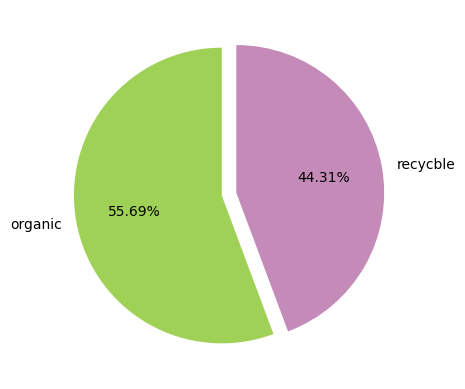

In [7]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','recycble'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])